# Plot problematic loads

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

chan_labels = {
    'TbFA': 'Tower-base FA',
    'TbSS': 'Tower-base SS',
    'YbTilt': 'Yaw-bearing tilt',
    'YbRoll': 'Yaw-bearing roll',
    'ShftTrs': 'Shaft torsion',
    'OoPBRM': 'Out-of-plane BRM',
    'IPBRM': 'In-plane BRM'    
}

extreme_DTU = {
    'TbFA': 364297.47,
    'TbSS': 117720.32,
    'YbTilt': 54987.89,
    'YbRoll': 23907.46,
    'ShftTrs': 20365.17,
    'OoPBRM': 72275.14,
    'IPBRM': 40770.71
}

extreme_BB = {
    'TbFA': 355353.59,
    'TbSS': 148816.86,
    'YbTilt': 47431.24,
    'YbRoll': 27173.47,
    'ShftTrs': 24296.24,
    'OoPBRM': 70007.54,
    'IPBRM': 44690.72,
}

fatigue_DTU = {
    'TbFA': 129826.23,
    'TbSS': 55207.15,
    'YbTilt': 32488.02,
    'YbRoll': 4039.54,
    'ShftTrs': 2839.47,
    'OoPBRM': 31335.80,
    'IPBRM': 31017.46
}

fatigue_BB = {
    'TbFA': 148271.15,
    'TbSS': 109988.75,
    'YbTilt': 23922.04,
    'YbRoll': 3917.64,
    'ShftTrs': 2783.95,
    'OoPBRM': 25005.26,
    'IPBRM': 32709.73
}

In [2]:
import matplotlib
import scienceplots

matplotlib.rcParams.update(matplotlib.rcParamsDefault) # TO RESET  PLOTS
plt.style.use(['science'])

# Set global font properties
plt.rcParams['legend.frameon'] = True  # Enable the legend frame
plt.rcParams['legend.fancybox'] = False  # No fancybox, just a regular box
plt.rcParams['legend.edgecolor'] = 'black'  # Black edge color
plt.rcParams['legend.framealpha'] = 1  # No transparency
plt.rcParams['font.size'] = 12
plt.rcParams['font.weight'] = 'normal'

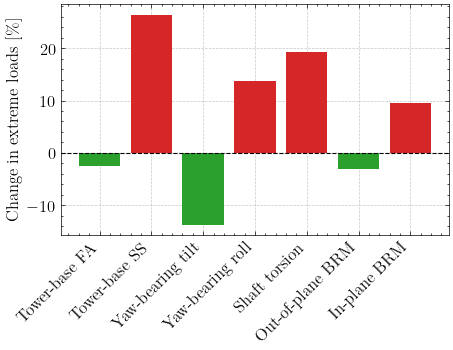

In [3]:
# Calculate percentage change
percent_change = {key: 100 * (extreme_BB[key] - extreme_DTU[key]) / extreme_DTU[key] for key in extreme_DTU}

# Prepare data for plotting
labels = list(chan_labels.values())
percentages = list(percent_change.values())
x = np.arange(len(labels))  # Label locations

# Percentage Change Chart
fig, ax2 = plt.subplots(figsize=(5, 3))
colors = ['tab:green' if pct < 0 else 'tab:red' for pct in percentages]
ax2.bar(x, percentages, color=colors)
ax2.set_ylabel('Change in extreme loads [\%]')
ax2.axhline(0, color='black', linewidth=0.8, linestyle='--')
ax2.set_xticks(x)
ax2.set_xticklabels(labels, rotation=45, ha='right')
ax2.set_axisbelow(True)  # Ensure gridlines are behind bars
plt.tick_params(axis='both', bottom=True, top=True, left=True, right=True, direction='in', which='major')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.7)
plt.savefig(f'plots/01_percent_change_extreme.pdf', dpi=300, bbox_inches='tight')
plt.show()

# Fatigue

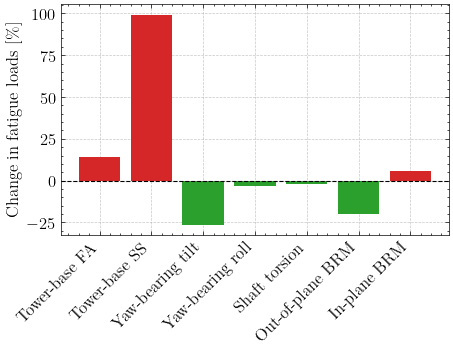

In [5]:
# Calculate percentage change
percent_change = {key: 100 * (fatigue_BB[key] - fatigue_DTU[key]) / fatigue_DTU[key] for key in fatigue_DTU}

# Prepare data for plotting
labels = list(chan_labels.values())
percentages = list(percent_change.values())
x = np.arange(len(labels))  # Label locations

# Percentage Change Chart
fig, ax2 = plt.subplots(figsize=(5, 3))
colors = ['tab:green' if pct < 0 else 'tab:red' for pct in percentages]
ax2.bar(x, percentages, color=colors)
ax2.set_ylabel('Change in fatigue loads [\%]')
ax2.axhline(0, color='black', linewidth=0.8, linestyle='--')
ax2.set_xticks(x)
ax2.set_xticklabels(labels, rotation=45, ha='right')
ax2.set_axisbelow(True)  # Ensure gridlines are behind bars
plt.tick_params(axis='both', bottom=True, top=True, left=True, right=True, direction='in', which='major')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.7)
plt.savefig(f'plots/01_percent_change_fatigue.pdf', dpi=300, bbox_inches='tight')
plt.show()